In [ ]:
from google.colab import drive
drive.mount('/content/Splitdataset0101')

Mounted at /content/Splitdataset0101


In [ ]:


from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.optimizers import Adam, SGD, RMSprop
import tensorflow as tf
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import random
from glob import glob
import imageio
from sklearn.preprocessing import LabelBinarizer
import shutil
from tensorflow.keras.models import load_model
from keras.applications import NASNetMobile
from re import VERBOSE
import gc
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint




In [ ]:


# Replace '/content/drive/MyDrive/Dataset/train_dataset' with your actual train path
source_path = '/content/Splitdataset0101/MyDrive/train_dataset'
destination_path = '/content/local_train_dataset'

# Copy the dataset
shutil.copytree(source_path, destination_path)


'/content/local_train_dataset'

In [ ]:

source_path = '/content/Splitdataset0101/MyDrive/valid_dataset'
destination_path = '/content/local_Valid_dataset'

# Copy the dataset
shutil.copytree(source_path, destination_path)

'/content/local_Valid_dataset'

In [ ]:

source_path = '/content/Splitdataset0101/MyDrive/test_dataset'
destination_path = '/content/local_test_dataset'

# Copy the dataset
shutil.copytree(source_path, destination_path)

'/content/local_test_dataset'

In [ ]:
# all train class names...
train_dir = sorted(os.listdir('/content/local_train_dataset'))
class_names_lst = [dir_name for dir_name in train_dir]
class_names_lst

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherd’s Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [ ]:
# all train class names...
test_dir = sorted(os.listdir('/content/local_test_dataset'))
class_names_lst = [dir_name for dir_name in test_dir]
class_names_lst

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherd’s Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [ ]:
# all train class names...
val_dir = sorted(os.listdir('/content/local_Valid_dataset'))
class_names_lst = [dir_name for dir_name in val_dir]
class_names_lst

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherd’s Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [ ]:
data_path = '/content/'
train_dir = os.path.join(data_path,'local_train_dataset')
test_dir = os.path.join(data_path, 'local_test_dataset')
val_dir = os.path.join(data_path, 'local_Valid_dataset')

In [ ]:
images_path= os.path.join(train_dir, '*', '*.png')
images = glob(images_path)

img_size = 224
train_images = []
train_labels = []
for i in images:
    train_images.append(cv2.resize(cv2.imread(i), (img_size, img_size)))
    train_labels.append(i.split('/')[-2])
train_X = np.asarray(train_images)
train_Y = pd.DataFrame(train_labels)

In [ ]:
images_path= os.path.join(val_dir, '*', '*.png')
images = glob(images_path)

img_size = 224
valid_images = []
valid_labels = []
for i in images:
    valid_images.append(cv2.resize(cv2.imread(i), (img_size, img_size)))
    valid_labels.append(i.split('/')[-2])
valid_X = np.asarray(valid_images)
valid_Y = pd.DataFrame(valid_labels)

In [ ]:
images_path= os.path.join(test_dir, '*', '*.png')
images = glob(images_path)

img_size = 224
test_images = []
test_labels = []
for i in images:
    test_images.append(cv2.resize(cv2.imread(i), (img_size, img_size)))
    test_labels.append(i.split('/')[-2])
test_X = np.asarray(test_images)
test_Y = pd.DataFrame(test_labels)

In [ ]:
# Get a list of subdirectories (categories) in the train path
categories = [category for category in os.listdir(source_path) if os.path.isdir(os.path.join(source_path, category))]

# Initialize total count
total_images = 0

# Print the count of images in each category and accumulate the total count
for category in categories:
    category_path = os.path.join(source_path, category)
    num_images = len(os.listdir(category_path))
    total_images += num_images
    print(f"Category: {category}, Number of Images: {num_images}")

# Print the total count of images across all categories
print(f"\nTotal Number of Images Across All Categories: {total_images}")

Category: Shepherd’s Purse, Number of Images: 29
Category: Loose Silky-bent, Number of Images: 78
Category: Scentless Mayweed, Number of Images: 62
Category: Common wheat, Number of Images: 23
Category: Common Chickweed, Number of Images: 66
Category: Charlock, Number of Images: 50
Category: Sugar beet, Number of Images: 54
Category: Maize, Number of Images: 18
Category: Fat Hen, Number of Images: 51
Category: Small-flowered Cranesbill, Number of Images: 51
Category: Cleavers, Number of Images: 31
Category: Black-grass, Number of Images: 41

Total Number of Images Across All Categories: 554


In [ ]:
test_Y

,0
0,Scentless Mayweed
1,Scentless Mayweed
2,Scentless Mayweed
3,Scentless Mayweed
4,Scentless Mayweed
...,...
549,Common Chickweed
550,Common Chickweed
551,Common Chickweed
552,Common Chickweed


In [ ]:
train_Y.rename(columns={0:'species'},inplace=True)
_, train_count = np.unique(train_Y,return_counts=True)
train_df = pd.DataFrame(data = train_count)
a = train_Y['species'].unique()
a = a.tolist()
a.sort()
train_df['Index'] = a
train_df.columns = ['Train','Name']
train_df

,Train,Name
0,212,Black-grass
1,323,Charlock
2,252,Cleavers
3,541,Common Chickweed
4,177,Common wheat
5,387,Fat Hen
6,556,Loose Silky-bent
7,189,Maize
8,414,Scentless Mayweed
9,187,Shepherd’s Purse


In [ ]:
y_train = LabelBinarizer().fit_transform(train_Y.species)
train_label = np.array(y_train,dtype=np.float32)
train_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
valid_Y.rename(columns={0:'species'},inplace=True)
_, valid_count = np.unique(valid_Y,return_counts=True)
valid_df = pd.DataFrame(data = valid_count)
a = valid_Y['species'].unique()
a = a.tolist()
a.sort()
valid_df['Index'] = a
valid_df.columns = ['Valid','Name']
valid_df

,Valid,Name
0,56,Black-grass
1,79,Charlock
2,52,Cleavers
3,106,Common Chickweed
4,53,Common wheat
5,100,Fat Hen
6,128,Loose Silky-bent
7,50,Maize
8,131,Scentless Mayweed
9,58,Shepherd’s Purse


In [ ]:
y_valid = LabelBinarizer().fit_transform(valid_Y.species)
valid_label = np.array(y_valid,dtype=np.float32)
valid_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test_Y.rename(columns={0:'species'},inplace=True)
_, test_count = np.unique(test_Y,return_counts=True)
test_df = pd.DataFrame(data = test_count)
a = test_Y['species'].unique()
a = a.tolist()
a.sort()
test_df['Index'] = a
test_df.columns = ['Test','Name']
test_df

,Test,Name
0,41,Black-grass
1,50,Charlock
2,31,Cleavers
3,66,Common Chickweed
4,23,Common wheat
5,51,Fat Hen
6,78,Loose Silky-bent
7,18,Maize
8,62,Scentless Mayweed
9,29,Shepherd’s Purse


In [ ]:
y_test = LabelBinarizer().fit_transform(test_Y.species)
test_label = np.array(y_test,dtype=np.float32)
test_label

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)


**Image** Normalization




In [ ]:
#X_train = train_X
#X_test = test_X
#X_valid = valid_X
X_train = train_X.astype('float32') / 255
X_test = test_X.astype('float32') / 255
X_valid = valid_X.astype('float32') / 255

### EfficientNetB2

## **Using best Hyper parameters train model**

In [ ]:
    base_model = NASNetMobile(include_top=False, weights='imagenet',  input_shape=(224, 224, 3), pooling='avg')
    base_model.trainable = True



19993432/19993432 [==============================] - 0s 0us/step


In [ ]:
    for i, layer in enumerate(base_model.layers):
        print(i, layer.name)

0 input_1
1 stem_conv1
2 stem_bn1
3 activation
4 reduction_conv_1_stem_1
5 reduction_bn_1_stem_1
6 activation_1
7 activation_3
8 separable_conv_1_pad_reduction_left1_stem_1
9 separable_conv_1_pad_reduction_right1_stem_1
10 separable_conv_1_reduction_left1_stem_1
11 separable_conv_1_reduction_right1_stem_1
12 separable_conv_1_bn_reduction_left1_stem_1
13 separable_conv_1_bn_reduction_right1_stem_1
14 activation_2
15 activation_4
16 separable_conv_2_reduction_left1_stem_1
17 separable_conv_2_reduction_right1_stem_1
18 activation_5
19 separable_conv_2_bn_reduction_left1_stem_1
20 separable_conv_2_bn_reduction_right1_stem_1
21 separable_conv_1_pad_reduction_right2_stem_1
22 activation_7
23 reduction_add_1_stem_1
24 separable_conv_1_reduction_right2_stem_1
25 separable_conv_1_pad_reduction_right3_stem_1
26 activation_9
27 separable_conv_1_bn_reduction_right2_stem_1
28 separable_conv_1_reduction_right3_stem_1
29 separable_conv_1_reduction_left4_stem_1
30 activation_6
31 separable_conv_1_bn_r

In [ ]:
    for layer in base_model.layers[:644]:
        layer.trainable = False

In [ ]:
    for layer in base_model.layers:
        print(f"{layer.name} ({'trainable' if layer.trainable else 'non-trainable'})")

input_1 (non-trainable)
stem_conv1 (non-trainable)
stem_bn1 (non-trainable)
activation (non-trainable)
reduction_conv_1_stem_1 (non-trainable)
reduction_bn_1_stem_1 (non-trainable)
activation_1 (non-trainable)
activation_3 (non-trainable)
separable_conv_1_pad_reduction_left1_stem_1 (non-trainable)
separable_conv_1_pad_reduction_right1_stem_1 (non-trainable)
separable_conv_1_reduction_left1_stem_1 (non-trainable)
separable_conv_1_reduction_right1_stem_1 (non-trainable)
separable_conv_1_bn_reduction_left1_stem_1 (non-trainable)
separable_conv_1_bn_reduction_right1_stem_1 (non-trainable)
activation_2 (non-trainable)
activation_4 (non-trainable)
separable_conv_2_reduction_left1_stem_1 (non-trainable)
separable_conv_2_reduction_right1_stem_1 (non-trainable)
activation_5 (non-trainable)
separable_conv_2_bn_reduction_left1_stem_1 (non-trainable)
separable_conv_2_bn_reduction_right1_stem_1 (non-trainable)
separable_conv_1_pad_reduction_right2_stem_1 (non-trainable)
activation_7 (non-trainable)

In [ ]:
    model = Sequential()
    model.add(base_model)

    #model.add(Dense(1024, activation='relu'))
    #model.add(Dense(256, activation='relu'))
    #model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.45209338238121477))
    model.add(Dense(12, activation='softmax'))

In [ ]:
model.compile(optimizer=SGD(learning_rate=0.034680290756933185),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 NASNet (Functional)         (None, 1056)              4269716   
                                                                 
 dropout_1 (Dropout)         (None, 1056)              0         
                                                                 
 dense_1 (Dense)             (None, 12)                12684     
                                                                 
Total params: 4,282,400
Trainable params: 1,778,668
Non-trainable params: 2,503,732
_________________________________________________________________


In [ ]:
model.save('my_pretrain_model.h5')

In [ ]:
print(os.path.getsize("my_pretrain_model.h5")/1048576, "MB")

17.553016662597656 MB


In [ ]:
checkpoint = ModelCheckpoint("best_hyper_model_2 100 epochs.h5",
                             monitor='val_accuracy',  # You can choose the metric to monitor (e.g., 'val_accuracy')
                             save_best_only=True,  # Save only the best model
                             mode='max',  # 'min' for loss, 'max' for accuracy, etc.
                             verbose=1)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,
        zoom_range = 0.1,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        vertical_flip=True
        )
datagen.fit(X_train)


In [ ]:
# Train the model
history=model.fit(datagen.flow(X_train, train_label,batch_size=32) ,epochs=100,  validation_data=(X_valid, valid_label), callbacks=[checkpoint])

Epoch 1/100
125/125 [==============================] - ETA: 0s - loss: 1.3801 - accuracy: 0.5414
Epoch 1: val_accuracy improved from -inf to 0.30692, saving model to best_hyper_model_2 100 epochs.h5
125/125 [==============================] - 90s 585ms/step - loss: 1.3801 - accuracy: 0.5414 - val_loss: 2.2669 - val_accuracy: 0.3069
Epoch 2/100
125/125 [==============================] - ETA: 0s - loss: 0.6644 - accuracy: 0.7610
Epoch 2: val_accuracy improved from 0.30692 to 0.42628, saving model to best_hyper_model_2 100 epochs.h5
125/125 [==============================] - 66s 529ms/step - loss: 0.6644 - accuracy: 0.7610 - val_loss: 2.0243 - val_accuracy: 0.4263
Epoch 3/100
125/125 [==============================] - ETA: 0s - loss: 0.5043 - accuracy: 0.8202
Epoch 3: val_accuracy improved from 0.42628 to 0.55266, saving model to best_hyper_model_2 100 epochs.h5
125/125 [==============================] - 66s 526ms/step - loss: 0.5043 - accuracy: 0.8202 - val_loss: 1.4774 - val_accuracy: 0.

### **CALLING SAVED MODEL**

In [ ]:
model1 = load_model('best_hyper_model_2 100 epochs.h5')

In [ ]:
print(os.path.getsize("best_hyper_model_2 100 epochs.h5")/1048576, "MB")

17.55493927001953 MB


In [ ]:
loss, acc = model1.evaluate(X_test,test_label)
loss1, acc1 = model1.evaluate(X_valid,valid_label)
loss2, acc2 = model1.evaluate(datagen.flow(X_valid,valid_label))
print('Test loss:', loss,'   Test accuracy:', acc)
print('Train loss:', loss1,'   Train accuracy:',acc1)
print('Train loss:', loss2,'   Train accuracy:',acc2)

32/32 [==============================] - 17s 408ms/step - loss: 0.3351 - accuracy: 0.9228
Test loss: 0.26291048526763916    Test accuracy: 0.922382652759552
Train loss: 0.2896115183830261    Train accuracy: 0.9287863373756409
Train loss: 0.33514657616615295    Train accuracy: 0.9227682948112488


18/18 [==============================] - 8s 214ms/step


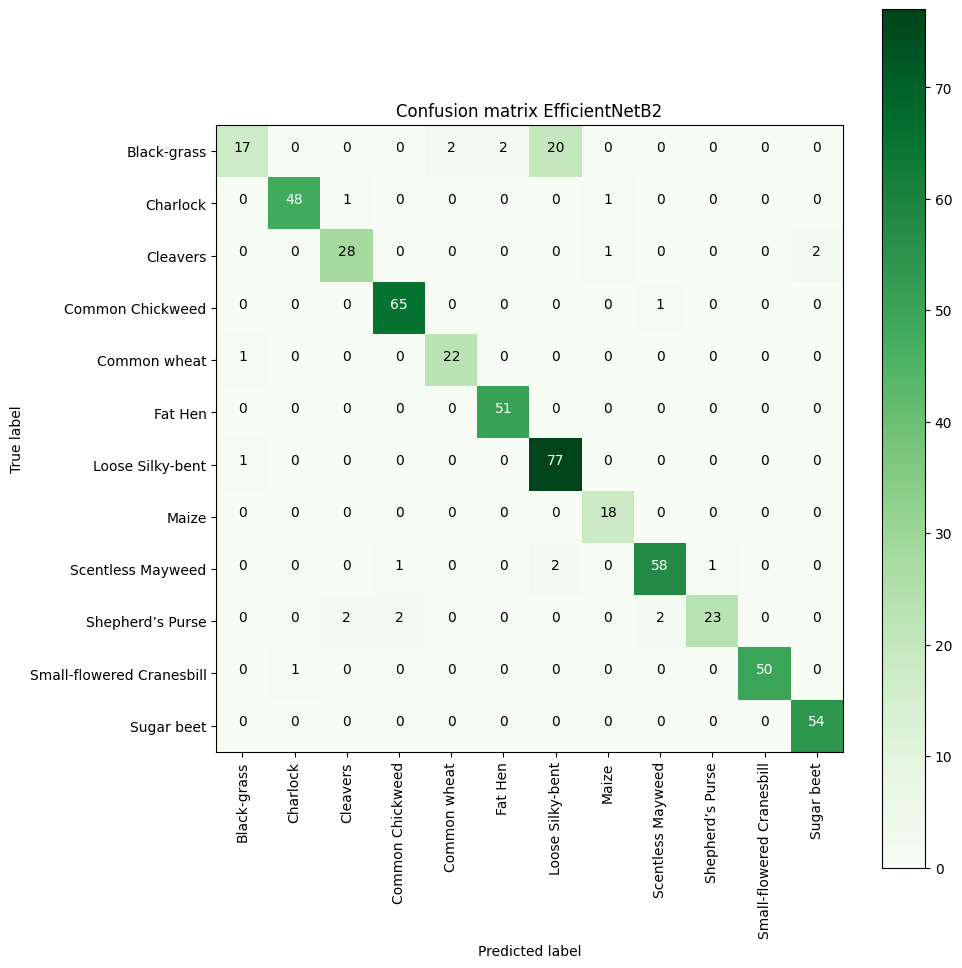

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix EfficientNetB2',
                          cmap=plt.cm.Greens):

    fig = plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
predY = model1.predict(X_test)
predYClasses = np.argmax(predY, axis = 1)
trueY = np.argmax(test_label, axis = 1)

# confusion matrix
confusionMTX = confusion_matrix(trueY, predYClasses)

# plot the confusion matrix
plot_confusion_matrix(confusionMTX, classes = class_names_lst)

In [ ]:
from sklearn.metrics import f1_score

print(f1_score(trueY, predYClasses, average='macro')) # macro, take the average of each class’s F-1 score:
print(f1_score(trueY, predYClasses, average='micro')) #micro calculates positive and negative values globally
print(f1_score(trueY, predYClasses, average='weighted')) #F-1 scores are averaged by using the number of instances in a class as weight
print(f1_score(trueY, predYClasses, average=None))

0.9105861841020767
0.9223826714801445
0.9158317760744419
[0.56666667 0.96969697 0.90322581 0.97014925 0.93617021 0.98076923
 0.8700565  0.94736842 0.94308943 0.86792453 0.99009901 0.98181818]


In [ ]:
from sklearn.metrics import classification_report

# Define your title
title = "Classification Report EfficientNetB2"

# Calculate the padding to center the title
padding_length = (80 - len(title)) // 2

# Create the formatted title with centered and bold text
formatted_title = f"\033[1;32;47m{' ' * padding_length}{title}{' ' * padding_length}\033[m"

# Print the formatted title
print(formatted_title)

print(classification_report(trueY, predYClasses, target_names=class_names_lst))

                      Classification Report EfficientNetB2                      
                           precision    recall  f1-score   support

              Black-grass       0.89      0.41      0.57        41
                 Charlock       0.98      0.96      0.97        50
                 Cleavers       0.90      0.90      0.90        31
         Common Chickweed       0.96      0.98      0.97        66
             Common wheat       0.92      0.96      0.94        23
                  Fat Hen       0.96      1.00      0.98        51
         Loose Silky-bent       0.78      0.99      0.87        78
                    Maize       0.90      1.00      0.95        18
        Scentless Mayweed       0.95      0.94      0.94        62
         Shepherd’s Purse       0.96      0.79      0.87        29
Small-flowered Cranesbill       1.00      0.98      0.99        51
               Sugar beet       0.96      1.00      0.98        54

                 accuracy                     

**Observation:**



*   Recall is very low for Black-grass.
*   Precison is below .70 for Black grass.
*   Even from Confusion matrix, we see model did not perform well for black grass.
*   Other classes have better balane between precision and recall and a goof f1 score.

Overall Accuracy is also great.





In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

multilabel_confusion_matrix(trueY, predYClasses)

array([[[511,   2],
        [ 24,  17]],

       [[503,   1],
        [  2,  48]],

       [[520,   3],
        [  3,  28]],

       [[485,   3],
        [  1,  65]],

       [[529,   2],
        [  1,  22]],

       [[501,   2],
        [  0,  51]],

       [[454,  22],
        [  1,  77]],

       [[534,   2],
        [  0,  18]],

       [[489,   3],
        [  4,  58]],

       [[524,   1],
        [  6,  23]],

       [[503,   0],
        [  1,  50]],

       [[498,   2],
        [  0,  54]]])

**Each plant category level TP, FP, FN, TN can be seen from above matrix:**

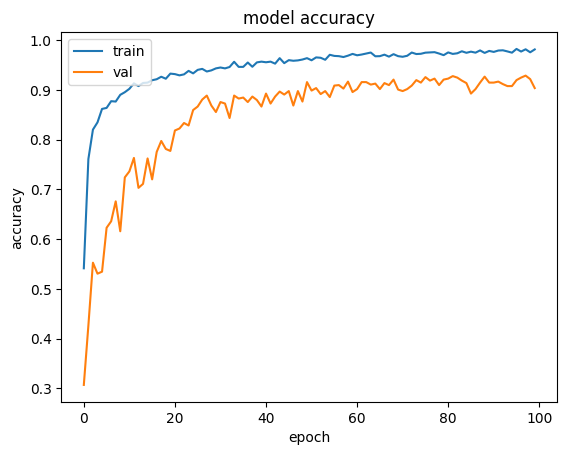

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()




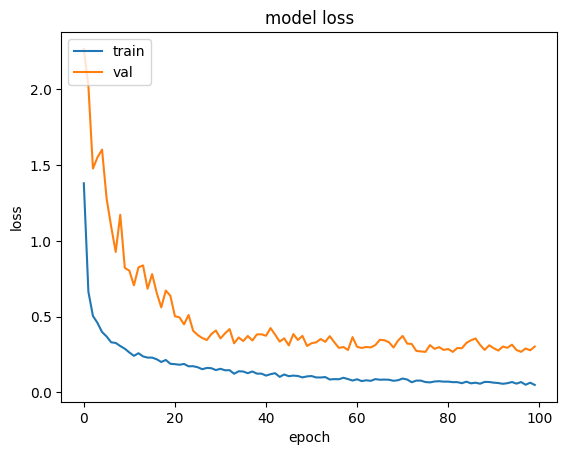

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


**Observation:**


*   Loss is decreasing and val loss is close to training loss
*   Accuracy of val set is also close to training accuracy
*   No overfitting or underfitting observerd based on the scores of val and testing sets





